<a href="https://colab.research.google.com/github/tjHendrixx/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


sns.set()

In [0]:
names = [
    'Class Name',
    'handicapped-infants',
    'water-project-cost-sharing',
    'adoption-of-the-budget-resolution',
    'physician-fee-freeze',
    'el-salvador-aid',
    'religious-groups-in-schools',
    'anti-satellite-test-ban',
    'aid-to-nicaraguan-contras',
    'mx-missile',
   'immigration',
   'synfuels-corporation-cutback',
   'education-spending',
   'superfund-right-to-sue',
   'crime',
   'duty-free-exports',
   'export-administration-act-south-africa']

In [0]:
DF = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None, names=names)

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', index_col='Class Name', header=None, names=names)

In [0]:
df = df.replace(['n','y','?'],[-1,1,0])

In [0]:
DF.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
Class Name,,,,,,,,,,,,,,,,
republican,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
democrat,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
democrat,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
democrat,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1


In [0]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
Class Name                                435 non-null object
handicapped-infants                       435 non-null object
water-project-cost-sharing                435 non-null object
adoption-of-the-budget-resolution         435 non-null object
physician-fee-freeze                      435 non-null object
el-salvador-aid                           435 non-null object
religious-groups-in-schools               435 non-null object
anti-satellite-test-ban                   435 non-null object
aid-to-nicaraguan-contras                 435 non-null object
mx-missile                                435 non-null object
immigration                               435 non-null object
synfuels-corporation-cutback              435 non-null object
education-spending                        435 non-null object
superfund-right-to-sue                    435 non-null object
crime                      

In [0]:
df.shape


(435, 16)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435 entries, republican to republican
Data columns (total 16 columns):
handicapped-infants                       435 non-null int64
water-project-cost-sharing                435 non-null int64
adoption-of-the-budget-resolution         435 non-null int64
physician-fee-freeze                      435 non-null int64
el-salvador-aid                           435 non-null int64
religious-groups-in-schools               435 non-null int64
anti-satellite-test-ban                   435 non-null int64
aid-to-nicaraguan-contras                 435 non-null int64
mx-missile                                435 non-null int64
immigration                               435 non-null int64
synfuels-corporation-cutback              435 non-null int64
education-spending                        435 non-null int64
superfund-right-to-sue                    435 non-null int64
crime                                     435 non-null int64
duty-free-exports             

In [0]:
col_lst = df.columns


In [0]:
col_lst


Index(['handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')

In [0]:
idx_lst = df.index

In [0]:
idx_lst

Index(['republican', 'republican', 'democrat', 'democrat', 'democrat',
       'democrat', 'democrat', 'republican', 'republican', 'democrat',
       ...
       'democrat', 'democrat', 'republican', 'democrat', 'democrat',
       'republican', 'democrat', 'republican', 'republican', 'republican'],
      dtype='object', name='Class Name', length=435)

In [0]:
transposed = df.T

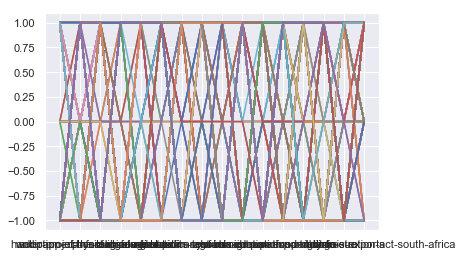

In [0]:
plt.plot(transposed);

In [0]:
transposed.head()

Class Name,republican,republican,democrat,democrat,democrat,democrat,democrat,republican,republican,democrat,...,democrat,democrat,republican,democrat,democrat,republican,democrat,republican,republican,republican
handicapped-infants,-1,-1,0,-1,1,-1,-1,-1,-1,1,...,-1,1,-1,0,1,-1,-1,-1,-1,-1
water-project-cost-sharing,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,0,-1,-1,-1,0,-1,1
adoption-of-the-budget-resolution,-1,-1,1,1,1,1,-1,-1,-1,1,...,1,1,-1,0,1,1,1,-1,-1,-1
physician-fee-freeze,1,1,0,-1,-1,-1,1,1,1,-1,...,-1,-1,1,-1,-1,1,-1,1,1,1
el-salvador-aid,1,1,1,0,1,1,1,1,1,-1,...,-1,-1,1,-1,0,1,-1,1,1,1


In [0]:
transposed.shape

(16, 435)

In [0]:
group_sum = df.groupby(level=0).sum()

In [0]:
group_sum

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
Class Name,,,,,,,,,,,,,,,,
democrat,54,1,202,-231,-145,-12,141,173,128,-15,3,-177,-106,-77,69,161
republican,-103,2,-120,161,149,132,-84,-109,-127,19,-117,115,114,155,-128,46


In [0]:
group_sum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, democrat to republican
Data columns (total 16 columns):
handicapped-infants                       2 non-null int64
water-project-cost-sharing                2 non-null int64
adoption-of-the-budget-resolution         2 non-null int64
physician-fee-freeze                      2 non-null int64
el-salvador-aid                           2 non-null int64
religious-groups-in-schools               2 non-null int64
anti-satellite-test-ban                   2 non-null int64
aid-to-nicaraguan-contras                 2 non-null int64
mx-missile                                2 non-null int64
immigration                               2 non-null int64
synfuels-corporation-cutback              2 non-null int64
education-spending                        2 non-null int64
superfund-right-to-sue                    2 non-null int64
crime                                     2 non-null int64
duty-free-exports                         2 non-null int64
exp

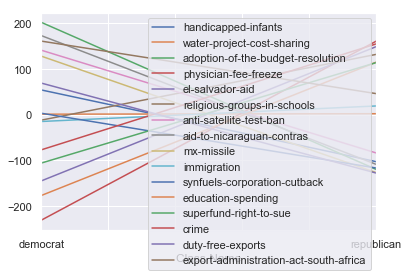

In [0]:
group_sum.plot()

([array([1., 2., 1., 1., 1., 3., 2., 0., 2., 3.]),
  array([0., 0., 6., 1., 0., 2., 1., 2., 3., 1.])],
 array([-231. , -187.7, -144.4, -101.1,  -57.8,  -14.5,   28.8,   72.1,
         115.4,  158.7,  202. ]),
 <a list of 2 Lists of Patches objects>)

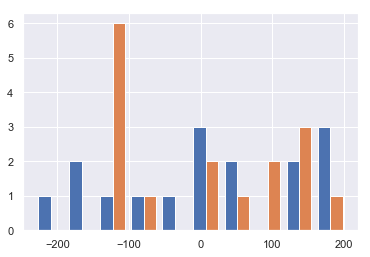

In [0]:
plt.hist(group_sum)

In [0]:
plt.swarmplot(group_sum)

AttributeError: module 'matplotlib.pyplot' has no attribute 'swarmplot'

In [0]:
group_sum.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, handicapped-infants to export-administration-act-south-africa
Data columns (total 2 columns):
democrat      16 non-null int64
republican    16 non-null int64
dtypes: int64(2)
memory usage: 1.0+ KB


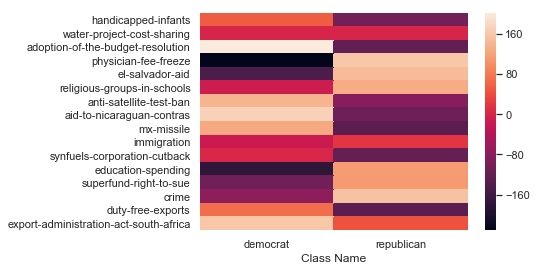

In [0]:
sns.heatmap(group_sum.T);

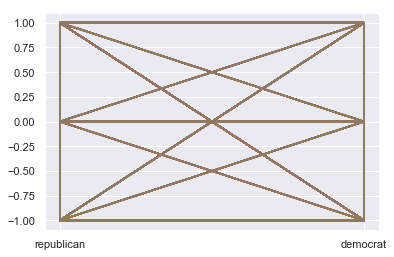

In [0]:
plt.plot(df);


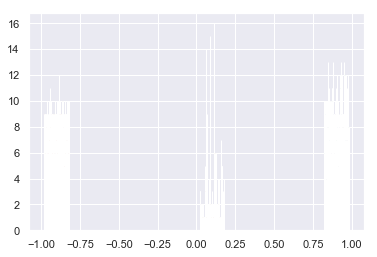

In [0]:
_ = plt.hist(df)
plt.show;

In [0]:
DF.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
DF_trans = DF.T

In [0]:
DF_trans.head()

,0,1,2,3,4,5,6,7,8,9,...,425,426,427,428,429,430,431,432,433,434
Class Name,republican,republican,democrat,democrat,democrat,democrat,democrat,republican,republican,democrat,...,democrat,democrat,republican,democrat,democrat,republican,democrat,republican,republican,republican
handicapped-infants,n,n,?,n,y,n,n,n,n,y,...,n,y,n,?,y,n,n,n,n,n
water-project-cost-sharing,y,y,y,y,y,y,y,y,y,y,...,n,n,n,?,n,n,n,?,n,y
adoption-of-the-budget-resolution,n,n,y,y,y,y,n,n,n,y,...,y,y,n,?,y,y,y,n,n,n
physician-fee-freeze,y,y,?,n,n,n,y,y,y,n,...,n,n,y,n,n,y,n,y,y,y


In [0]:
DF_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Class Name to export-administration-act-south-africa
Columns: 435 entries, 0 to 434
dtypes: object(435)
memory usage: 58.5+ KB


In [0]:
DF.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
grouped = group_sum.T

In [0]:
grouped['Party Division'] = abs(abs(grouped.democrat) - abs(grouped.republican))

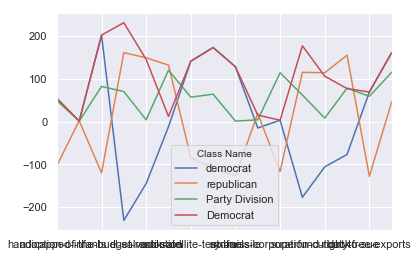

In [0]:
grouped.plot()

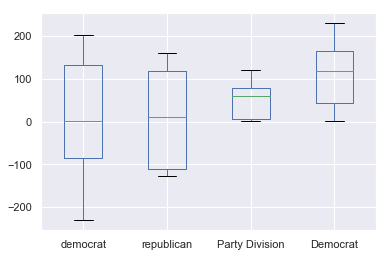

In [0]:
grouped.boxplot();

In [0]:
grouped.head(25)

Class Name,democrat,republican,Party Division,Democrat
handicapped-infants,54,-103,49,54
water-project-cost-sharing,1,2,1,1
adoption-of-the-budget-resolution,202,-120,82,202
physician-fee-freeze,-231,161,70,231
el-salvador-aid,-145,149,4,145
religious-groups-in-schools,-12,132,120,12
anti-satellite-test-ban,141,-84,57,141
aid-to-nicaraguan-contras,173,-109,64,173
mx-missile,128,-127,1,128
immigration,-15,19,4,15


In [0]:
df_counts = DF.apply(pd.Series.value_counts)

In [0]:
df_counts.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
?,NaN,12.0,48.0,11.0,11.0,15.0,11.0,14.0,15.0,22.0,7.0,21.0,31.0,25.0,17.0,28.0,104.0
democrat,267.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n,NaN,236.0,192.0,171.0,247.0,208.0,152.0,182.0,178.0,206.0,212.0,264.0,233.0,201.0,170.0,233.0,62.0
republican,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y,NaN,187.0,195.0,253.0,177.0,212.0,272.0,239.0,242.0,207.0,216.0,150.0,171.0,209.0,248.0,174.0,269.0


In [0]:
df_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, ? to y
Data columns (total 17 columns):
Class Name                                2 non-null float64
handicapped-infants                       3 non-null float64
water-project-cost-sharing                3 non-null float64
adoption-of-the-budget-resolution         3 non-null float64
physician-fee-freeze                      3 non-null float64
el-salvador-aid                           3 non-null float64
religious-groups-in-schools               3 non-null float64
anti-satellite-test-ban                   3 non-null float64
aid-to-nicaraguan-contras                 3 non-null float64
mx-missile                                3 non-null float64
immigration                               3 non-null float64
synfuels-corporation-cutback              3 non-null float64
education-spending                        3 non-null float64
superfund-right-to-sue                    3 non-null float64
crime                                     3 non-nu

In [0]:
counts_trans = df_counts.T

In [0]:
counts_trans.head()

,?,democrat,n,republican,y
Class Name,NaN,267.0,NaN,168.0,NaN
handicapped-infants,12.0,NaN,236.0,NaN,187.0
water-project-cost-sharing,48.0,NaN,192.0,NaN,195.0
adoption-of-the-budget-resolution,11.0,NaN,171.0,NaN,253.0
physician-fee-freeze,11.0,NaN,247.0,NaN,177.0


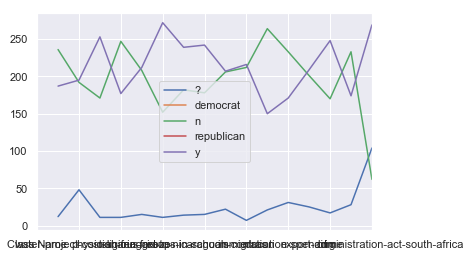

In [0]:
counts_trans.plot();